<h1> Analysis Report </h1> 
<h2> Brooke Moncol </h2>
<h2> 11/21/23 </h2>

<h5> My two favorite albums that are avaliable on Spotify are "The First Time" by The Kid LAROI, and "1989 Taylor's Version" by Taylor swift </h5>

I chose these two albums because they recently came out within the past few weeks, and they both are some of my favorite artists that I've listened to for years. The First Time means a lot to me because I can realate to the songs a lot as I have been through a break up before. 1989 Taylor's Version, means a lot to me because it's a rerelease of the album and it happened to be the album that got me interested in Taylor Swift as an artist. 

<h3> Setting Up Application </h3>

In [3]:
import requests
import pandas as pd
import base64
import json
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats

In [4]:
Client_ID = pd.read_csv('Spotify_Keys_9-19-23')['Client_ID'].iloc[0]

In [5]:
Client_Secret = pd.read_csv('Spotify_Keys_9-19-23')['Client_Secret'].iloc[0]

In [6]:
#Client_ID

In [7]:
#Client_Secret

In [8]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))

In [9]:
#client_cred

In [10]:
headers = {"Authorization" : "Basic {}".format(client_cred.decode("ascii"))}

In [11]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [12]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

In [13]:
#session_key_response.json()['access_token']

In [14]:
session_header_key = session_key_response.json()

In [15]:
#session_header_key['access_token']

In [16]:
key = session_header_key['access_token']

In [17]:
session_headers = {"Authorization" : "Bearer {}".format(key)}

In [18]:
#session_headers

<h3> Getting The First Time Album </h3>

In [19]:
firstTime_id = '63IolVUykZCHMlu2zu9jHS'

In [20]:
firstTime_album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(firstTime_id)

In [21]:
response = requests.get(url = firstTime_album_url,headers = session_headers)

In [22]:
first = json.loads(response.text) 

In [23]:
firstTime_df = pd.DataFrame(first['items'])

In [24]:
firstTime_audio_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(firstTime_df['id'])))

In [25]:
firstTime_features_response = requests.get(url = firstTime_audio_features_url, headers = session_headers)

In [26]:
first_audio = firstTime_features_response.json()

In [27]:
first_valence = [x['valence'] for x in first_audio['audio_features']]

In [28]:
first_danceability = [x['danceability'] for x in first_audio['audio_features']]b

The data wrangling for getting these albums was probably the hardest part for me, as I had to figure out the path to get to the valence and danceability features within the audio features API. I could have done this a few different ways, but what I found the easiest for the analysis later on in this report is to use the "x for x in" function. This was the easiest for me to do as it saved me time for less possible errors and less typing/code. I only had to call one function name instead of a long one with strings. 

<h3> Getting 1989 Taylors Version Album </h3>

In [29]:
TV_id = '1o59UpKw81iHR0HPiSkJR0'

In [30]:
TV_album_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(TV_id)

In [31]:
TV_response = requests.get(url = TV_album_url,headers = session_headers)

In [32]:
TV = json.loads(TV_response.text)

In [33]:
TV_df = pd.DataFrame(TV['items'])

In [34]:
TV_audio_features_url = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(TV_df['id'])))

In [35]:
TV_features_response = requests.get(url = TV_audio_features_url, headers = session_headers)

In [36]:
TV_audio = TV_features_response.json()

In [37]:
TV_valence = [x['valence'] for x in TV_audio['audio_features']]

In [38]:
TV_danceability = [x['danceability'] for x in TV_audio['audio_features']]

I think the two audio features that capture the important qualities of the two albums are the valence and danceability. I think this because I believe that they have a direct correlation with each other. A song doesn't typically have a high valence without a high danceability. I also have preconcieved opinions that both of these albums have a high valence and danceability, so I would like to test out this theory. 

<h3> Histogram </h3>

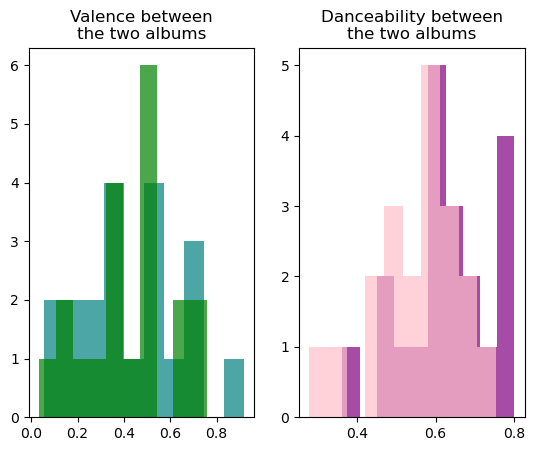

In [73]:
fig1, ax1 = plt.subplots(1,2)

ax1[0].hist(TV_valence, alpha = .7, color = 'teal')
ax1[0].hist(first_valence, alpha = .7, color = 'green')
ax1[1].hist(TV_danceability, alpha = .7, color = 'purple')
ax1[1].hist(first_danceability,alpha = .7, color = 'pink')
ax1[0].set_title('Valence between\nthe two albums')
ax1[1].set_title('Danceability between\nthe two albums')
plt.show()

<h3> What can you conclude? </h3>
I can conclude that the danceability seems to be slightly higher in 1989 Taylors version compared to The First Time. Something interesting to point out is that the valence seems to be lower than I would have expected for the both albums .

<h3> Scatter Plot </h3>

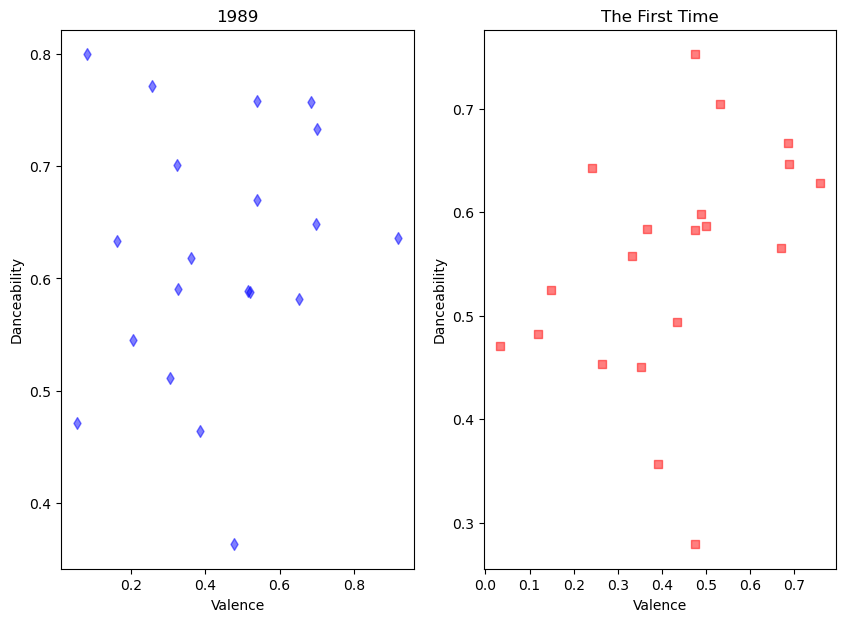

In [59]:
fig2, ax2 = plt.subplots(1,2, figsize = (10,7))
ax2[0].scatter(x = TV_valence,
            y = TV_danceability,
            label = '1989',
            color = 'blue',
            alpha = .5,
            marker = 'd')
ax2[1].scatter(x = first_valence,
            y = first_danceability,
            label = 'The First Time',
            color = 'red',
            alpha = .5,
            marker = 's')

ax2[0].set_ylabel('Danceability')
ax2[0].set_xlabel('Valence')
ax2[1].set_ylabel('Danceability')
ax2[1].set_xlabel('Valence')
ax2[0].set_title('1989')
ax2[1].set_title('The First Time')

plt.show()

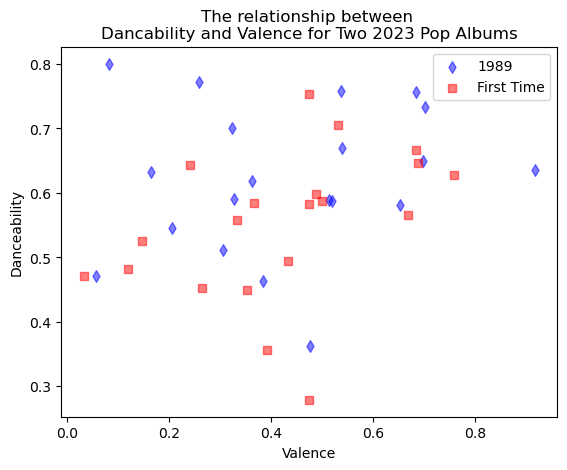

In [52]:
fig2, ax2 = plt.subplots()
ax2.scatter(x = TV_valence,
            y = TV_danceability,
            label = '1989',
            color = 'blue',
            alpha = .5,
            marker = 'd')
ax2.scatter(x = first_valence, 
            y = first_danceability, 
            label = 'First Time',
            color = 'red',
            alpha = .5,
            marker = 's')
ax2.set_ylabel('Danceability')
ax2.set_xlabel('Valence')
ax2.set_title('The relationship between \nDancability and Valence for Two 2023 Pop Albums')
ax2.legend()
plt.show()

The source and structure of the data used in the report was first utilizing spotify's Track and Audio Feature APIs to get access each album, and then their features. The structure of this data is to first show how I used the API's, then I show the valence and danceability between the two in a few different ways for different analysis, in my opinion the scatter plot above is the easiest to understand. I then do a statistical analysis below, using the Ttest function, to show the comparison of the valence between the two albums for those who prefer number data instead of visual. 

<h3> Boxplot </h3>

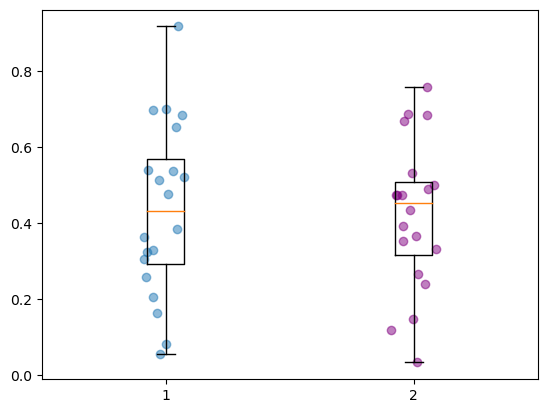

In [58]:
TV_xs = [1] * len(TV_valence)
first_xs = [2] * len(first_valence)
TV_x_jitter = np.random.uniform(-0.10,.10, len(TV_xs))
first_x_jitter = np.random.uniform(-.10,.10, len(first_xs))


fig2, ax2 = plt.subplots()
ax2.boxplot(TV_valence,positions = [1])
ax2.boxplot(first_valence,positions = [2])
ax2.scatter(TV_xs + TV_x_jitter, TV_valence, alpha = .5)
ax2.scatter(first_xs + first_x_jitter, first_valence, alpha = .5, color = 'purple')


plt.show()

<h3> TTest </h3>

In [412]:
result1 = stats.ttest_ind(TV_valence,first_valence)

In [414]:
result1.pvalue

0.8346362732630197

The results of the ttest_ind tells us that the valence between the two albums is extremely similar, as it is above a 0.05, which is how we know if there is a significant difference between two albums,

<h3> Conclusion </h3> 

Based off the data I have collected and analyzed throughout this project, I can see that the two albums are extremely similar in their valence and danceability. Both 1989 Taylors Version, and The First Time have extremely high valence as well as danceability trends in their albums. 

The limitations of the data and analysis are that I cannot see the valence and danceability of each song. Alternative approaches to this could be doing an individual analysis of each song on the album to see their invidual valence and dancability scores. Potential next steps for this analysis would be to test more audio features between each album to see a more in-depth comparison. 